In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords 
from stop_words import get_stop_words

In [2]:
df1 = pd.read_csv("spam_ham_dataset.csv")

In [12]:
df1.head()

,text,label_num
0,nron methanol ; meter # : 988291\r\nthis is a ...,0
1,"pl nom for january 9 , 2001\r\n( see attached ...",0
2,"eon retreat\r\nho ho ho , we ' re around to th...",0
3,"hotoshop , windows , office . cheap . main tre...",1
4,e : indian springs\r\nthis deal is to book the...,0


In [3]:
df3 = pd.read_csv("spam.csv",encoding="ISO-8859-1")

In [14]:
df3.head()

,text,label_num
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
5,FreeMsg Hey there darling it's been 3 week's n...,1
8,WINNER!! As a valued network customer you have...,1
9,Had your mobile 11 months or more? U R entitle...,1
11,"SIX chances to win CASH! From 100 to 20,000 po...",1


### Data cleaning

In [4]:
df1.drop(['Unnamed: 0', "label"], axis=1, inplace = True)

In [5]:
df1["text"] = df1["text"].apply(lambda x: x[10:])

In [6]:
df3.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"], axis = 1, inplace = True)

In [7]:
df3 = df3[["v2", "v1"]]

In [8]:
df3.rename(columns = {"v2":"text", "v1":"label_num"}, inplace = True)

In [9]:
df3["label_num"].replace({"ham":0, "spam": 1}, inplace = True)

In [10]:
df3 = df3[df3["label_num"] == 1]

In [13]:
df3

,text,label_num
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
5,FreeMsg Hey there darling it's been 3 week's n...,1
8,WINNER!! As a valued network customer you have...,1
9,Had your mobile 11 months or more? U R entitle...,1
11,"SIX chances to win CASH! From 100 to 20,000 po...",1
...,...,...
5537,Want explicit SEX in 30 secs? Ring 02073162414...,1
5540,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,1
5547,Had your contract mobile 11 Mnths? Latest Moto...,1
5566,REMINDER FROM O2: To get 2.50 pounds free call...,1


In [14]:
df = pd.concat([df1,df3], ignore_index=True)

In [15]:
df

,text,label_num
0,nron methanol ; meter # : 988291\r\nthis is a ...,0
1,"pl nom for january 9 , 2001\r\n( see attached ...",0
2,"eon retreat\r\nho ho ho , we ' re around to th...",0
3,"hotoshop , windows , office . cheap . main tre...",1
4,e : indian springs\r\nthis deal is to book the...,0
...,...,...
5913,Want explicit SEX in 30 secs? Ring 02073162414...,1
5914,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,1
5915,Had your contract mobile 11 Mnths? Latest Moto...,1
5916,REMINDER FROM O2: To get 2.50 pounds free call...,1


In [16]:
stop_words = set(stopwords.words('english')) 

df['text'] = df['text'].apply(lambda x: ' '.join([ word for word in word_tokenize(x)  if not word in stop_words ]))

### Spam vs Ham countplot

/Users/ada/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label_num', ylabel='count'>

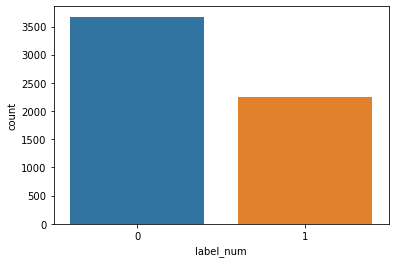

In [17]:
sns.countplot(df['label_num'])

In [18]:
X = df["text"].values
y = df["label_num"].values

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=11)

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
cv_trans = cv.fit_transform(X_train).toarray()


In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer()
tf_trans = tf.fit_transform(X_train).toarray()

# <b><i>Logistic Regression</i></b>


In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
lr = LogisticRegression()
grid={"C":[float(i) for i in range(1, 3)], "penalty":["l2"], "solver":[ 'lbfgs', 'liblinear']} 
grid = GridSearchCV(lr,grid,refit=True,verbose=4)
grid.fit(cv_trans,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] C=1.0, penalty=l2, solver=lbfgs .................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ..... C=1.0, penalty=l2, solver=lbfgs, score=0.972, total=   9.9s
[CV] C=1.0, penalty=l2, solver=lbfgs .................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.0s remaining:    0.0s


[CV] ..... C=1.0, penalty=l2, solver=lbfgs, score=0.979, total=   9.3s
[CV] C=1.0, penalty=l2, solver=lbfgs .................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   19.4s remaining:    0.0s


[CV] ..... C=1.0, penalty=l2, solver=lbfgs, score=0.971, total=   8.3s
[CV] C=1.0, penalty=l2, solver=lbfgs .................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   27.8s remaining:    0.0s


[CV] ..... C=1.0, penalty=l2, solver=lbfgs, score=0.981, total=   8.0s
[CV] C=1.0, penalty=l2, solver=lbfgs .................................
[CV] ..... C=1.0, penalty=l2, solver=lbfgs, score=0.982, total=   7.8s
[CV] C=1.0, penalty=l2, solver=liblinear .............................
[CV] . C=1.0, penalty=l2, solver=liblinear, score=0.973, total=   4.2s
[CV] C=1.0, penalty=l2, solver=liblinear .............................
[CV] . C=1.0, penalty=l2, solver=liblinear, score=0.979, total=   4.4s
[CV] C=1.0, penalty=l2, solver=liblinear .............................
[CV] . C=1.0, penalty=l2, solver=liblinear, score=0.971, total=   3.5s
[CV] C=1.0, penalty=l2, solver=liblinear .............................
[CV] . C=1.0, penalty=l2, solver=liblinear, score=0.979, total=   2.7s
[CV] C=1.0, penalty=l2, solver=liblinear .............................
[CV] . C=1.0, penalty=l2, solver=liblinear, score=0.982, total=   2.9s
[CV] C=2.0, penalty=l2, solver=lbfgs .................................
[CV] .

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  1.9min finished


GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [1.0, 2.0], 'penalty': ['l2'],
                         'solver': ['lbfgs', 'liblinear']},
             verbose=4)

In [23]:
print("Tuned Hpyerparameters :",grid.best_params_)
print("accuracy :",grid.best_score_)

Tuned Hpyerparameters : {'C': 2.0, 'penalty': 'l2', 'solver': 'liblinear'}
accuracy : 0.9775473039515626


In [24]:
lr = LogisticRegression(solver='lbfgs', penalty ='l2' , C = 2.0)
lr.fit(cv_trans, y_train)

LogisticRegression(C=2.0)

In [25]:
test_cvtrans = cv.transform(X_test).toarray()


In [26]:
pred = lr.predict(test_cvtrans)

In [27]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### Logistic Regression evaluation CountVectorizer

In [28]:
print("classification report:\n",classification_report(y_test, pred))
print("confusion matrix:\n", confusion_matrix(y_test,pred))
print("accuracy score:\n",accuracy_score(y_test, pred))

classification report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98      1096
           1       0.95      0.99      0.97       680

    accuracy                           0.98      1776
   macro avg       0.97      0.98      0.97      1776
weighted avg       0.98      0.98      0.98      1776

confusion matrix:
 [[1058   38]
 [   6  674]]
accuracy score:
 0.9752252252252253


In [29]:
lr_2 = LogisticRegression(solver='lbfgs', penalty ='l2' , C = 2.0)
lr_2.fit(tf_trans, y_train)
test_tftrans = tf.transform(X_test).toarray()

In [30]:
pred2 = lr_2.predict(test_tftrans)

### Logistic Regression evaluation TfidfVectorizer

In [31]:
print("classification report:\n",classification_report(y_test, pred2))
print("confusion matrix:\n", confusion_matrix(y_test,pred2))
print("accuracy score:\n",accuracy_score(y_test, pred2))

classification report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98      1096
           1       0.95      1.00      0.98       680

    accuracy                           0.98      1776
   macro avg       0.98      0.98      0.98      1776
weighted avg       0.98      0.98      0.98      1776

confusion matrix:
 [[1064   32]
 [   2  678]]
accuracy score:
 0.9808558558558559


# <b><i>SVC</i></b>

In [32]:
from sklearn.svm import SVC
svc_model = SVC()

In [33]:
svc_model.fit(cv_trans,y_train)

SVC()

In [34]:
pred_svc = svc_model.predict(test_cvtrans)

### SVC evaluation CountVectorizer

In [35]:
print("classification report:\n",classification_report(y_test, pred_svc))
print("confusion matrix:\n", confusion_matrix(y_test,pred_svc))
print("accuracy score:\n",accuracy_score(y_test, pred_svc))

classification report:
               precision    recall  f1-score   support

           0       0.99      0.90      0.94      1096
           1       0.86      0.98      0.92       680

    accuracy                           0.93      1776
   macro avg       0.92      0.94      0.93      1776
weighted avg       0.94      0.93      0.93      1776

confusion matrix:
 [[986 110]
 [ 11 669]]
accuracy score:
 0.9318693693693694


In [36]:
svc_model2 = SVC()
svc_model2.fit(tf_trans, y_train)

SVC()

In [37]:
pred_svc2 = svc_model2.predict(test_tftrans)

### SVC evaluation TfidfVectorizer

In [38]:
print("classification report:\n",classification_report(y_test, pred_svc2))
print("confusion matrix:\n", confusion_matrix(y_test,pred_svc2))
print("accuracy score:\n",accuracy_score(y_test, pred_svc2))

classification report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99      1096
           1       0.96      1.00      0.98       680

    accuracy                           0.98      1776
   macro avg       0.98      0.99      0.98      1776
weighted avg       0.98      0.98      0.98      1776

confusion matrix:
 [[1068   28]
 [   2  678]]
accuracy score:
 0.9831081081081081


# <b><i>Naive Bayes</i></b>

In [39]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(cv_trans, y_train)

MultinomialNB()

In [40]:
pred_nb = nb.predict(test_cvtrans)

### Naive Bayes evaluation CountVectorizer

In [41]:
print("classification report:\n",classification_report(y_test, pred_nb))
print("confusion matrix:\n", confusion_matrix(y_test,pred_nb))
print("accuracy score:\n",accuracy_score(y_test, pred_nb))

classification report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98      1096
           1       0.97      0.98      0.97       680

    accuracy                           0.98      1776
   macro avg       0.98      0.98      0.98      1776
weighted avg       0.98      0.98      0.98      1776

confusion matrix:
 [[1074   22]
 [  16  664]]
accuracy score:
 0.9786036036036037


In [42]:
nb2 = MultinomialNB()
nb2.fit(tf_trans, y_train)

MultinomialNB()

In [43]:
pred_nb2 = nb2.predict(test_tftrans)

### Naive Bayes evaluation TfidfVectorizer

In [44]:
print("classification report:\n",classification_report(y_test, pred_nb2))
print("confusion matrix:\n", confusion_matrix(y_test,pred_nb2))
print("accuracy score:\n",accuracy_score(y_test, pred_nb2))

classification report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97      1096
           1       0.99      0.91      0.95       680

    accuracy                           0.96      1776
   macro avg       0.97      0.95      0.96      1776
weighted avg       0.96      0.96      0.96      1776

confusion matrix:
 [[1090    6]
 [  59  621]]
accuracy score:
 0.9634009009009009


# <b><i>Decision Tree</i></b>

In [45]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
tree.fit(cv_trans, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [46]:
pred_tree = tree.predict(test_cvtrans)


### Decision Tree evaluation CountVectorizer

In [47]:
print("classification report:\n",classification_report(y_test, pred_tree))
print("confusion matrix:\n", confusion_matrix(y_test,pred_tree))
print("accuracy score:\n",accuracy_score(y_test, pred_tree))

classification report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.95      1096
           1       0.94      0.91      0.92       680

    accuracy                           0.94      1776
   macro avg       0.94      0.94      0.94      1776
weighted avg       0.94      0.94      0.94      1776

confusion matrix:
 [[1053   43]
 [  58  622]]
accuracy score:
 0.9431306306306306


In [48]:
tree2 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
tree2.fit(tf_trans, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [49]:
pred_tree2 = tree2.predict(test_tftrans)

### Decision Tree evaluation TfidfVectorizer

In [50]:
print("classification report:\n",classification_report(y_test, pred_tree2))
print("confusion matrix:\n", confusion_matrix(y_test,pred_tree2))
print("accuracy score:\n",accuracy_score(y_test, pred_tree2))

classification report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95      1096
           1       0.92      0.93      0.92       680

    accuracy                           0.94      1776
   macro avg       0.94      0.94      0.94      1776
weighted avg       0.94      0.94      0.94      1776

confusion matrix:
 [[1039   57]
 [  51  629]]
accuracy score:
 0.9391891891891891


# <b><i>Random Forest</i></b>

In [51]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
forest.fit(cv_trans, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [52]:
pred_forest = forest.predict(test_cvtrans)

### Random Forest evaluation CountVectorizer

In [53]:
print("classification report:\n",classification_report(y_test, pred_forest))
print("confusion matrix:\n", confusion_matrix(y_test,pred_forest))
print("accuracy score:\n",accuracy_score(y_test, pred_forest))

classification report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97      1096
           1       0.95      0.94      0.94       680

    accuracy                           0.96      1776
   macro avg       0.96      0.95      0.95      1776
weighted avg       0.96      0.96      0.96      1776

confusion matrix:
 [[1064   32]
 [  44  636]]
accuracy score:
 0.9572072072072072


In [54]:
forest2 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
forest2.fit(tf_trans, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [55]:
pred_forest2 = forest2.predict(test_tftrans)

### Random Forest evaluation TfidfVectorizer

In [56]:
print("classification report:\n",classification_report(y_test, pred_forest2))
print("confusion matrix:\n", confusion_matrix(y_test,pred_forest2))
print("accuracy score:\n",accuracy_score(y_test, pred_forest2))

classification report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.96      1096
           1       0.94      0.94      0.94       680

    accuracy                           0.96      1776
   macro avg       0.95      0.95      0.95      1776
weighted avg       0.96      0.96      0.96      1776

confusion matrix:
 [[1058   38]
 [  41  639]]
accuracy score:
 0.9555180180180181
